In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [24]:
import warnings
warnings.filterwarnings('ignore')
import os

In [25]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [26]:
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [27]:
# prompt: convert iris to dataframe

iris_df = pd.DataFrame(data= X, columns= ["petal_length", "petal_width", "sepal_length", "sepal_width"])
iris_df['species'] = y
iris_df.head()


,petal_length,petal_width,sepal_length,sepal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


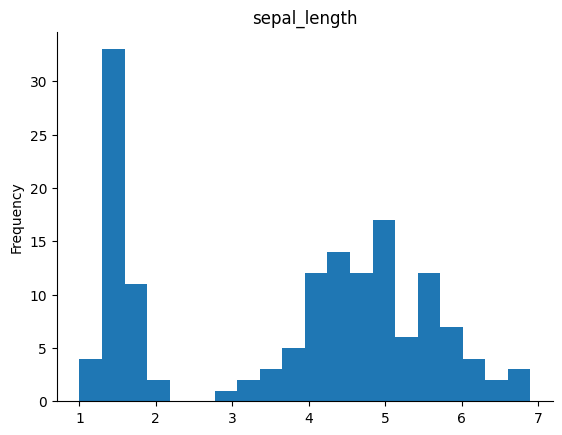

In [31]:
from matplotlib import pyplot as plt
iris_df['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

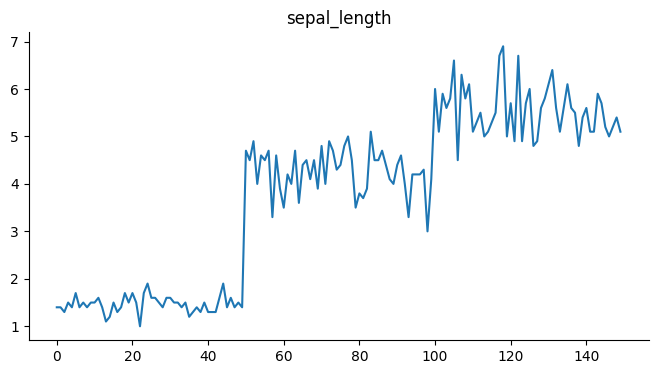

In [30]:
from matplotlib import pyplot as plt
iris_df['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

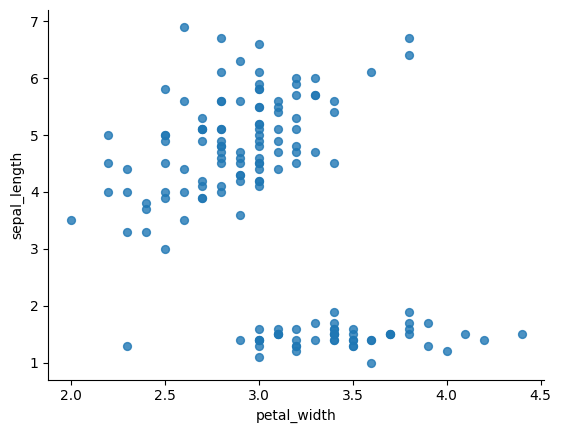

In [29]:
from matplotlib import pyplot as plt
iris_df.plot(kind='scatter', x='petal_width', y='sepal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

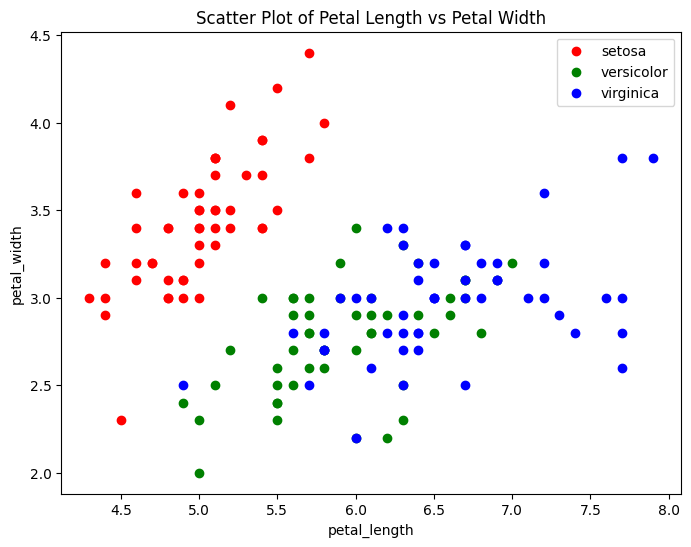

In [32]:
# prompt: scatter plot to visualize the dataset

setosa = iris_df[iris_df['species'] == 0]
versicolor = iris_df[iris_df['species'] == 1]
virginica = iris_df[iris_df['species'] == 2]

plt.figure(figsize=(8, 6))

plt.scatter(setosa['petal_length'], setosa['petal_width'], label='setosa', color='red')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], label='versicolor', color='green')
plt.scatter(virginica['petal_length'], virginica['petal_width'], label='virginica', color='blue')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.legend()
plt.show()


In [33]:
# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=3)

In [34]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [35]:
# StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
# Reshape the data to be compatible with RNN input
# RNN expects input shape: [samples, time steps, features]
# Here, we use time steps = 1
# X = X.reshape((X.shape[0], 1, X.shape[1]))
X.shape

(150, 1, 4)

In [45]:
# prompt: X = X.reshape((X.shape[0], 1, X.shape[1]))
# ValueError: cannot reshape array of size 600 into shape (150,1,1)

X = X.reshape((150, 1, 4))  # This is just an example


In [ ]:
model = Sequential()

model.add(SimpleRNN(3, input_shape=(4,5)))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the data to be compatible with RNN input
# RNN expects input shape: [samples, time steps, features]
# Here, we use time steps = 1
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Print some example predictions
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, True: {true_classes[i]}')


Epoch 1/50
8/8 [==============================] - 2s 64ms/step - loss: 0.9662 - accuracy: 0.5083 - val_loss: 0.8984 - val_accuracy: 0.7000
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.8809 - accuracy: 0.6417 - val_loss: 0.8130 - val_accuracy: 0.8667
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.8042 - accuracy: 0.7500 - val_loss: 0.7413 - val_accuracy: 0.9000
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.7412 - accuracy: 0.8250 - val_loss: 0.6779 - val_accuracy: 0.8667
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6870 - accuracy: 0.8250 - val_loss: 0.6235 - val_accuracy: 0.9000
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6409 - accuracy: 0.8500 - val_loss: 0.5773 - val_accuracy: 0.9000
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6022 - accuracy: 0.8500 - val_loss: 0.5366 - val_accuracy: 0.9000
Epoch 8/50
8/8 [===========

In [55]:
# Get user input
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))

# Create input data
input_data = np.array([[petal_length, petal_width, sepal_length, sepal_width]])

# Standardize the input data
input_data = scaler.transform(input_data)

# Reshape the input data to be compatible with RNN input
input_data = input_data.reshape((1, 1, 4))

# Make predictions
predictions = model.predict(input_data)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the prediction
if predicted_class == 0:
    print("Predicted species: Setosa")
elif predicted_class == 1:
    print("Predicted species: Versicolor")
else:
    print("Predicted species: Virginica")


Enter petal length: 6.1
Enter petal width: 2.6
Enter sepal length: 5.6
Enter sepal width: 1.4
1/1 [==============================] - 0s 20ms/step
Predicted species: Virginica


In [54]:
iris_df.sample(2)

,petal_length,petal_width,sepal_length,sepal_width,species
53,5.5,2.3,4.0,1.3,1
134,6.1,2.6,5.6,1.4,2


In [56]:
# prompt: drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [62]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the Quora dataset
df = pd.read_csv('/content/drive/MyDrive/quora_question_pair_nlp_project/data/quora.csv')

df = df[:10000]
# Keep necessary columns and drop missing values
df = df[['question1', 'question2', 'is_duplicate']].dropna()

# Tokenizer parameters
max_words = 20000  # Maximum number of words to keep, based on word frequency
max_len = 50       # Maximum length of each question sequence

# Tokenizer instance
tokenizer = Tokenizer(num_words=max_words)

# Fit tokenizer on both questions
tokenizer.fit_on_texts(df['question1'].tolist() + df['question2'].tolist())

# Convert questions to sequences
q1_seq = tokenizer.texts_to_sequences(df['question1'].tolist())
q2_seq = tokenizer.texts_to_sequences(df['question2'].tolist())

# Pad sequences
q1_data = pad_sequences(q1_seq, maxlen=max_len)
q2_data = pad_sequences(q2_seq, maxlen=max_len)

# Labels
labels = df['is_duplicate'].values

# Split data into training and testing sets
q1_train, q1_test, q2_train, q2_test, y_train, y_test = train_test_split(q1_data, q2_data, labels, test_size=0.2, random_state=42)

# Embedding parameters
embedding_dim = 128

# Input layers for the two questions
input_q1 = Input(shape=(max_len,))
input_q2 = Input(shape=(max_len,))

# Shared Embedding layer
embedding_layer = Embedding(max_words, embedding_dim, input_length=max_len)

# Encode each of the two questions
encoded_q1 = embedding_layer(input_q1)
encoded_q2 = embedding_layer(input_q2)

# Shared LSTM layer
shared_lstm = LSTM(64)

# Encode the sequences
output_q1 = shared_lstm(encoded_q1)
output_q2 = shared_lstm(encoded_q2)

# Merge the encoded sequences
merged = concatenate([output_q1, output_q2])

# Add a dense layer
dense = Dense(128, activation='relu')(merged)
dropout = Dropout(0.5)(dense)
dense = Dense(64, activation='relu')(dropout)
dropout = Dropout(0.5)(dense)
# Output layer
output = Dense(1, activation='sigmoid')(dense)

# Build the model
model = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit([q1_train, q2_train], y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate([q1_test, q2_test], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 50, 128)              2560000   ['input_5[0][0]',             
                                                                     'input_6[0][0]']             
                                                                                                  
 lstm_2 (LSTM)               (None, 64)                   49408     ['embedding_2[0][0]',   

In [65]:
# prompt: test the model ask user input

# Get user input
question1 = input("Enter first question: ")
question2 = input("Enter second question: ")

# Convert questions to sequences
q1_seq = tokenizer.texts_to_sequences([question1])
q2_seq = tokenizer.texts_to_sequences([question2])

# Pad sequences
q1_data = pad_sequences(q1_seq, maxlen=max_len)
q2_data = pad_sequences(q2_seq, maxlen=max_len)

# Predict
prediction = model.predict([q1_data, q2_data])

# Print the prediction
if prediction[0] > 0.5:
    print("Questions are duplicates")
else:
    print("Questions are not duplicates")


Enter first question: i love car
Enter second question: i love tesla
1/1 [==============================] - 0s 28ms/step
Questions are duplicates
